In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import utils
import matplotlib.pyplot as plt

model = tf.keras.models.load_model("C:\\Users\\Matthew Saad\\OneDrive\\College\\Spring 2023\\AI & ML\\Final-Project-AI-ML\\saved_models\\FINISHED\\corrected_12mil_25epoch_64batch_0.0001learnRate")

In [3]:
df = pd.read_csv("../../data/kaggleDataset/chessData.csv", nrows = 50_000)
df = df[~df['Evaluation'].astype(str).str.contains('\ufeff')]

df = utils.processDF(df)

In [12]:
df = pd.read_csv("../../data/kaggleDataset/chessData.csv").sample(50_000)
df = df[~df['Evaluation'].astype(str).str.contains('\ufeff')]

df["betterPre"] = df.Evaluation.apply(utils.new_preprocess_scores)

df = df.sort_values(by = "betterPre")

df = df[["FEN", "Evaluation"]]

In [13]:
data = utils.processDF(df)

x = data.iloc[:, :-1].to_numpy().astype(np.int8)
stockfish = data.iloc[:, -1].to_numpy().astype(np.int16)

In [14]:
predictions = model.predict(x).round().astype(np.int16).flatten()

error = stockfish - predictions

1563/1563 [==============================] - 3s 2ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


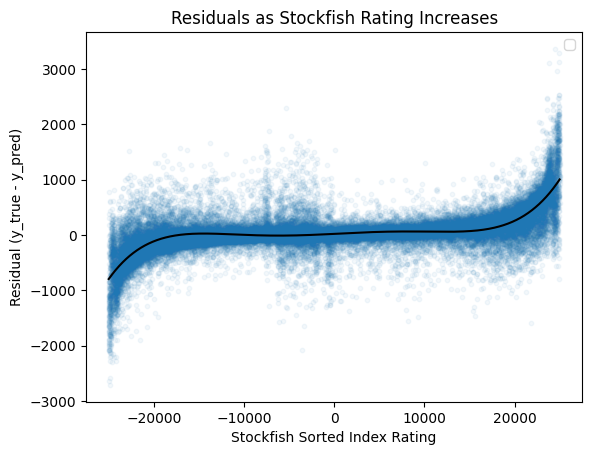

In [15]:
x = np.arange(len(error)) - len(error) // 2

# Fit a polynomial of degree 3 to the data
coefficients = np.polyfit(x, error, 5)

# This creates a function from the coefficients
polynomial = np.poly1d(coefficients)

# Generate y-values for the polynomial at each x
y_fit = polynomial(x)

# Plot the original data
plt.scatter(x, error, alpha=0.05, s = 10)
plt.plot(x, y_fit, color='black') # Plot the polynomial fit

plt.title('Residuals as Stockfish Rating Increases')
plt.xlabel('Stockfish Sorted Index Rating')
plt.ylabel('Residual (y_true - y_pred)')
plt.legend()
plt.show()

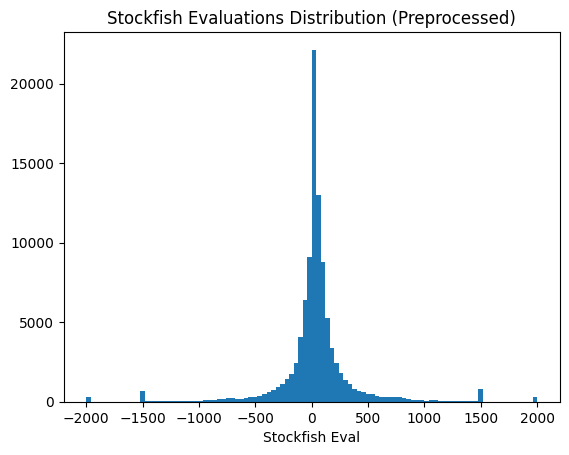

In [ ]:
plt.hist(stockfish, bins = 100)
plt.title("Stockfish Evaluations Distribution (Preprocessed)")
plt.xlabel("Stockfish Eval")
plt.show()